# Boston Housing Project 
Udacity's Machine Learning Nanodegree, assignment 1

In this project, I evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, I will separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable I seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics

In [2]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


### Feature Observation
We expect that 'RM' is positively correlated with 'MEDV', as houses with more rooms tend to have larger footprint, and hence cost more.
We expect that 'LSTAT' is negatively correlated with 'MEDV', as people who are looking to buy property in poorer neighborhoods are typically looking for cheaper housing.
We expect that 'PTRATIO' is negatively correlated with 'MEDV' as lower ratio of students to teachers is typically measured in better schools, therefore in desirable/more expensive neighborhoods.

----

## Developing a Model

### Define a Performance Metric

In [3]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


R2 score of 0.923 means that the dependent variable is predictable from the independent variable 92.3% of the cases, which means that the model is very good.

### Implementation: Shuffle and Split Data
Split the data into training and testing subsets. The data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [5]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 15)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


----

## Analyzing Model Performance
Next, I take a look at several models' learning and testing performances on various subsets of training data. Additionally, I investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. 

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

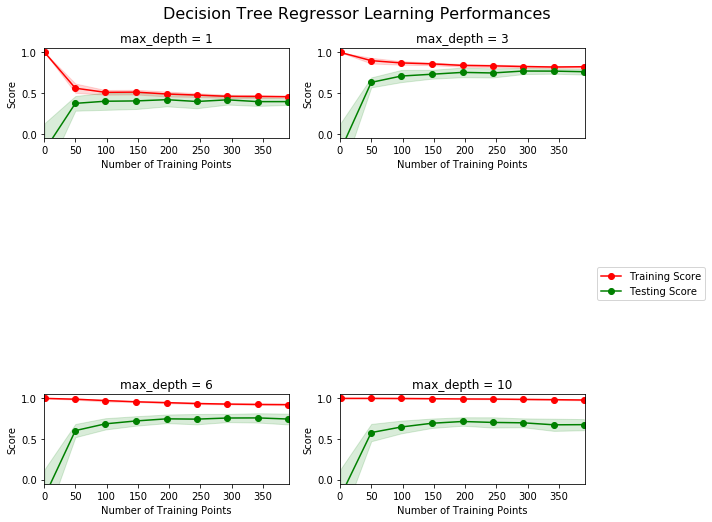

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

Observation:
As more points are added, the training score drops, while the testing score and its standard deviation improve.
The increase of the testing score means that training on more points benefits the model in this case, up to about 300 training points. After that, the model stops improving.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

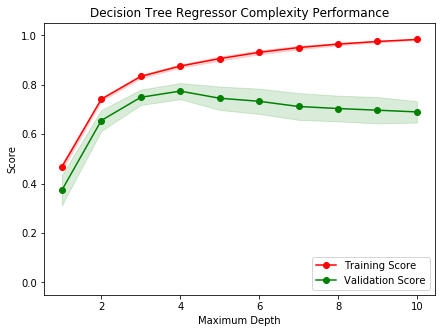

In [7]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff
* max_depth = 1 corresponds to high bias, which can be also seen from the low performance scores on both the training and test sets.
* For max_depth = 10 we see that the training score is 1, while the test score has dropped to about 0.7. This means that the model is overfitting on the training data, and performing poorly on the test data.
* The max depth which results in the highest validation accuracy (i.e. 4 in the example plot above.)
* Increasing the max_depth means increasing the model complexity. This is useful up to a point where the model becomes so complex that is starts overfitting and its accuracy on new data drops.

-----

## Evaluating Model Performance
Next, I construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

In [8]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1, 11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv=3, iid ='True')

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Optimal Model

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


### Predicting Selling Prices: let's test the model

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $416,550.00
Predicted selling price for Client 2's home: $220,556.76
Predicted selling price for Client 3's home: $919,609.09


* Predicted selling price for Client 1's home: $416,550.00

* Predicted selling price for Client 2's home: $220,556.76

* Predicted selling price for Client 3's home: $919,609.09

* These prediction seem reasonable. Client 2 has the smallest house in a neighborhood with high povery rate (32%) and high PTRATIO, and the model correctly predicts a comparatively low price for their home. Client 2 has a large house, in a neighborhood with excellent metrics, hence the expected selling price is much higher. Client 1's home has a moderately sized home in a neighborhood with average metrics, and as expected, the model predicts a price between the prices of the other two properties.

### Sensitivity
Check for robustness:

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $411,000.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $428,316.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $28,652.84


Conclusion:

The model I build is relatively simple and uses a relatively small dataset with just 3 features.
In reality, there are many other features that need to be taken into account in order to make the model applicable to the real world. Some such features include exact square footage, presence of upgrades, rating for the location within the neighborhood, construction date, current and projected median house prices in the area, inflation, etc.
The model that I built is relatively robust, as my tests showed that the variation of predictions due to variations in the training data are about 7%. However, this number most probably could be improved by adjusting some of the model attributes, e.g. using a different cross-validation technique. Using a larger dataset would also reduce the error.
